In [1]:
import os
from msc_project.utils import data_utils as du
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
DATA_PATH = ["/scratch/msc24h18/msc_project/data/20241024_LBE247_analyzed_2nd_run_only", "/scratch/msc24h18/msc_project/data/LBE247_analyzed_2nd_run_only"]
READ_VOLTAGE = 0.1

summary_files = []
for path in DATA_PATH:
    summary_files += du.get_summary_files(path)
summaries = [du.read_summary_file(f) for f in summary_files]

for s in summaries:
    s[0]["device_name"] = "LBE247"
    s[1]["I_high (A)"] = 0.1 / s[1]["R_low (ohm)"]
    s[1]["I_low (A)"] = 0.1 / s[1]["R_high (ohm)"]
    s[0]["I_max (high)"] = max(s[1]["I_high (A)"])
    s[0]["I_max (low)"] = max(s[1]["I_low (A)"])
    s[0]["I_min (high)"] = min(s[1]["I_high (A)"])
    s[0]["I_min (low)"] = min(s[1]["I_low (A)"])


summaries_dict = {key: np.array([d[0][key] for d in summaries]) for key in summaries[0][0].keys()}
summaries_df = pd.DataFrame(summaries_dict)
summaries_df = summaries_df.apply(pd.to_numeric, errors='ignore')

summaries_df.to_csv("/scratch/msc24h18/msc_project/results/LBE247_currents/LBE247_w_currents.csv", index=False)

/tmp/ipykernel_2761280/778228846.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  summaries_df = summaries_df.apply(pd.to_numeric, errors='ignore')


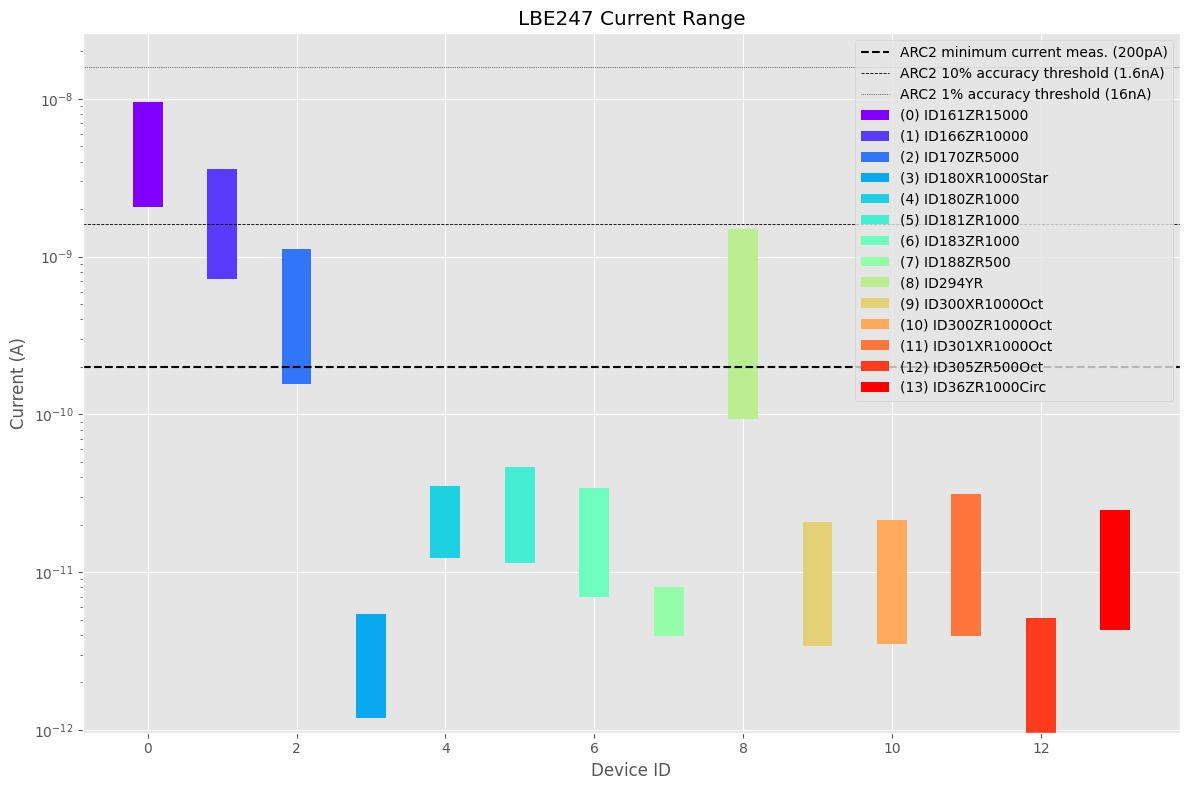

In [3]:
data = summaries_df.sort_values(by=['device_id', 'test_time'])
data = data.groupby(by='device_id').mean(numeric_only=True)
data.head()
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))
for i, (device_id, row) in enumerate(data.iterrows()):
    current_range = row["I_max (high)"] - row["I_min (high)"]
    ax.bar(i, height=current_range, bottom=row["I_min (high)"], width=0.4, label=f"({i}) {device_id}", color=colors[i])

ax.set(xlabel='Device ID', ylabel='Current (A)', title='LBE247 Current Range', yscale='log')
ax.axhline(y=200e-12, label='ARC2 minimum current meas. (200pA)', color='black', ls='--')
ax.axhline(y=1.6e-9, label='ARC2 10% accuracy threshold (1.6nA)', color='black', ls='--', lw=0.6)
ax.axhline(y=16e-9, label='ARC2 1% accuracy threshold (16nA)', color='black', ls=':', lw=0.5)
ax.legend()
plt.tight_layout()
#plt.savefig("/scratch/msc24h18/msc_project/results/LBE247_currents/LBE247_current_range.png")
plt.show()